In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
all_species = r"C:\Users\lwfeckesim\01_PyTorch\wze-uav\wze-uav-master\plots\3_classes\3_classes_RGB-RE-NIR\confmat_3-classes_RGB-RE-NIR_all_species.csv"
spruces = r"C:\Users\lwfeckesim\01_PyTorch\wze-uav\wze-uav-master\plots\3_classes\3_classes_RGB-RE-NIR\confmat_3-classes_RGB-RE-NIR_Picea_abies.csv"
pines = r"C:\Users\lwfeckesim\01_PyTorch\wze-uav\wze-uav-master\plots\3_classes\3_classes_RGB-RE-NIR\confmat_3-classes_RGB-RE-NIR_Pinus_sylvestris.csv"
firs = r"C:\Users\lwfeckesim\01_PyTorch\wze-uav\wze-uav-master\plots\3_classes\3_classes_RGB-RE-NIR\confmat_3-classes_RGB-RE-NIR_Abies_alba.csv"
beeches = r"C:\Users\lwfeckesim\01_PyTorch\wze-uav\wze-uav-master\plots\3_classes\3_classes_RGB-RE-NIR\confmat_3-classes_RGB-RE-NIR_Fagus_sylvatica.csv"
oaks = r"C:\Users\lwfeckesim\01_PyTorch\wze-uav\wze-uav-master\plots\3_classes\3_classes_RGB-RE-NIR\confmat_3-classes_RGB-RE-NIR_Quercus.csv"
class_names = ['healthy', 'stressed', 'dead']

In [3]:
path = r"C:\Users\lwfeckesim\01_PyTorch\wze-uav\wze-uav-master\plots\14-classes_plotsplit\14-classes_RGB-RE-NIR_plotsplit\droplast_false\confmat_RGB-RE-NIR_combined_14species_plotsplit.csv"
class_names = ['Picea abies healthy', 'Picea abies stressed', 'Pinus sylvestris healthy', 'Pinus sylvestris stressed', 
               'Abies alba healthy', 'Abies alba stressed', 'Fagus sylvatica healthy', 'Fagus sylvatica stressed',
               'Quercus spp. healthy', 'Quercus spp. stressed', 'Larix spp.', 'Acer spp.', 'Betula pendula', 'Dead trees']
output_path_cm = r"C:\Users\lwfeckesim\Downloads\confmat_14-classes_plotsplit.png"

C:\Users\lwfeckesim\AppData\Local\Temp\2\ipykernel_14232\23526652.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_cm = df_confusion.values / df_confusion.sum(axis=1)[:, np.newaxis]


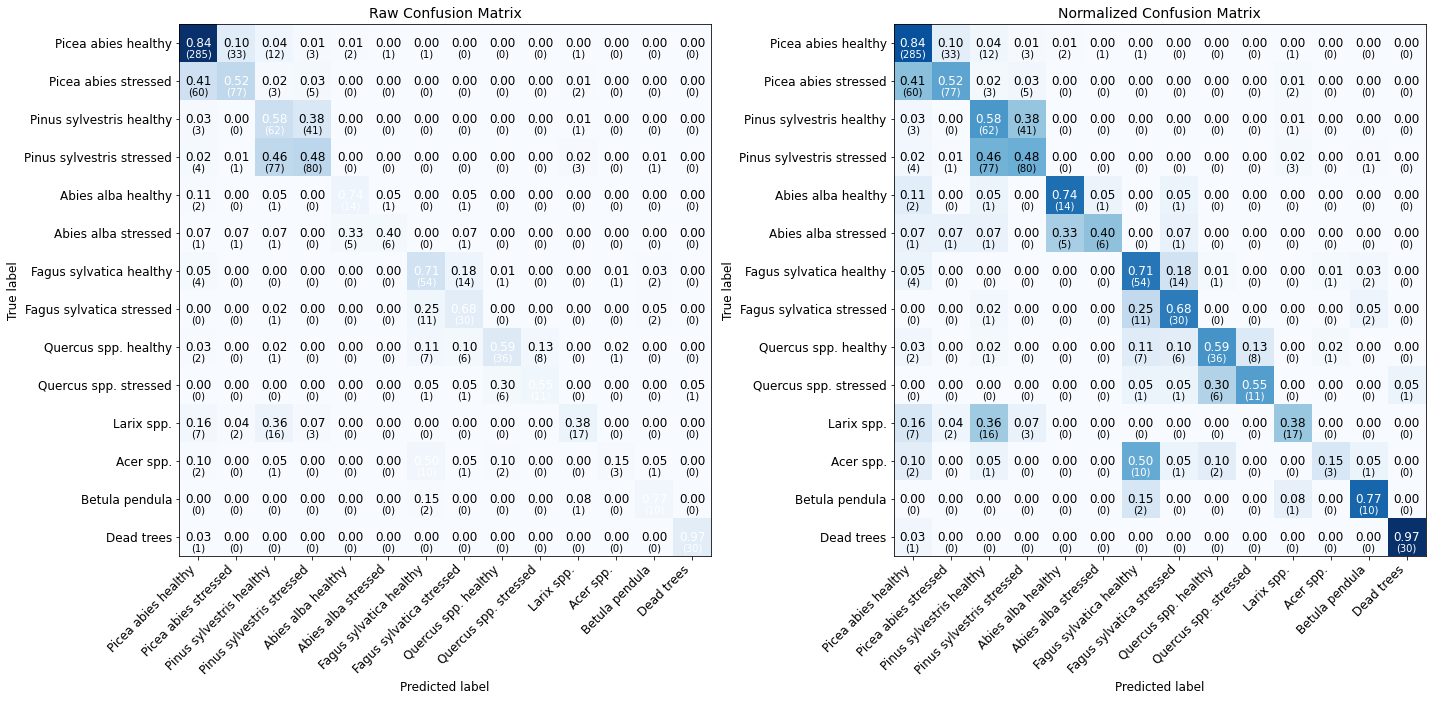

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the confusion matrix from the CSV file
confusion_matrix = pd.read_csv(path, header=None)

# Create a DataFrame from the confusion matrix data
df_confusion = pd.DataFrame(confusion_matrix.values, index=class_names, columns=class_names)

# Calculate the normalized confusion matrix
normalized_cm = df_confusion.values / df_confusion.sum(axis=1)[:, np.newaxis]

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the raw confusion matrix
im1 = axs[0].imshow(df_confusion, interpolation='nearest', cmap=plt.cm.Blues)
axs[0].set_title('Raw Confusion Matrix', fontsize=14)

# Plot the normalized confusion matrix
im2 = axs[1].imshow(normalized_cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1].set_title('Normalized Confusion Matrix', fontsize=14)

# Add colorbars
#cbar1 = fig.colorbar(im1, ax=axs[0])
#cbar2 = fig.colorbar(im2, ax=axs[1])

# Set the ticks and tick labels for both axes
ticks = np.arange(len(class_names))
for ax in axs:
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
    ax.set_yticklabels(class_names, fontsize=12)

    # Loop over data dimensions and create text annotations for normalized values
    thresh = normalized_cm.max() / 2.0
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            ax.text(j, i, "{:.2f}".format(normalized_cm[i, j]), ha="center", va="center",
                    fontsize=12 if normalized_cm[i, j] > thresh else 12,
                    color="white" if normalized_cm[i, j] > thresh else "black")

    # Loop over data dimensions and create additional text annotations for support count
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            ax.text(j, i+0.3, "({:.0f})".format(df_confusion.iat[i, j]), ha="center", va="center",
                    fontsize=10, color="white" if normalized_cm[i, j] > thresh else "black")

# Set labels and titles for both axes
axs[0].set_xlabel('Predicted label', fontsize=12)
axs[0].set_ylabel('True label', fontsize=12)
axs[1].set_xlabel('Predicted label', fontsize=12)
axs[1].set_ylabel('True label', fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\lwfeckesim\AppData\Local\Temp\2\ipykernel_14232\877738471.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_cm = df_confusion.values / df_confusion.sum(axis=1)[:, np.newaxis] * 100


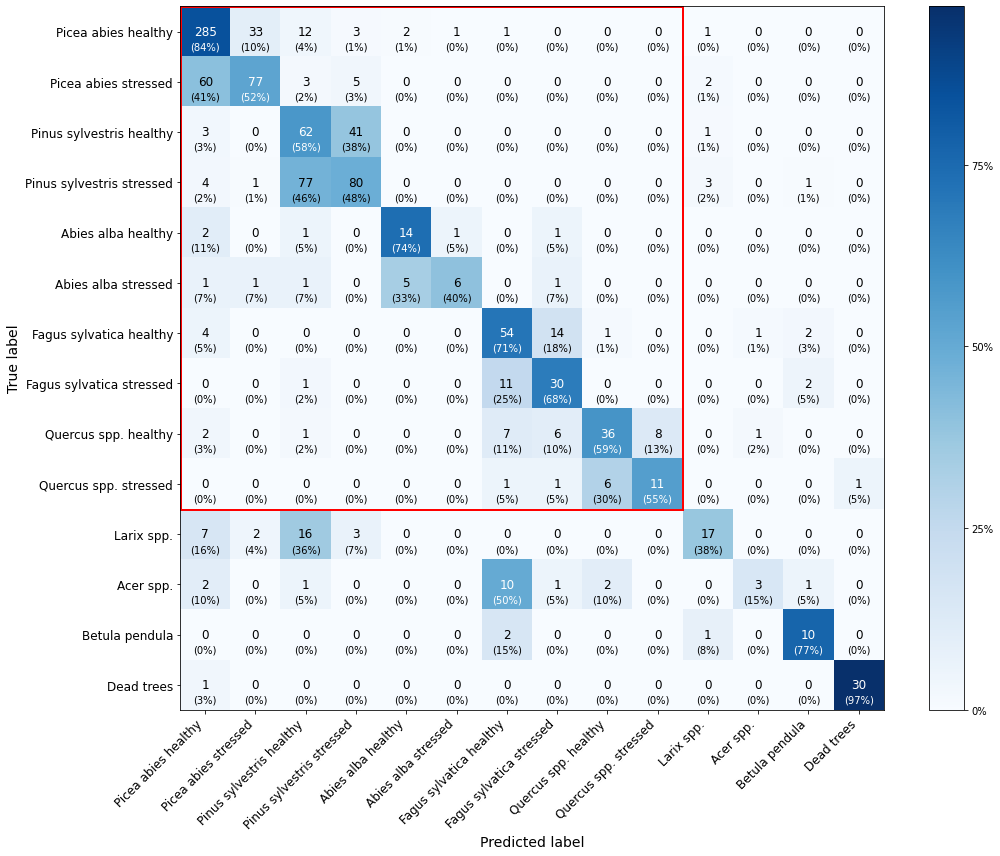

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the confusion matrix from the CSV file
confusion_matrix = pd.read_csv(path, header=None)

# Create a DataFrame from the confusion matrix data
df_confusion = pd.DataFrame(confusion_matrix.values, index=class_names, columns=class_names)

# Calculate the normalized confusion matrix
normalized_cm = df_confusion.values / df_confusion.sum(axis=1)[:, np.newaxis] * 100

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 12))

# Plot the confusion matrix
im = ax.imshow(normalized_cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax, format="%.0f%%", ticks=[0, 25, 50, 75, 100])

# Set the ticks and tick labels
ticks = np.arange(len(class_names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)

# Loop over data dimensions and create text annotations for normalized values
thresh = normalized_cm.max() / 2.0
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, "{:.0f}".format(df_confusion.values[i, j]), ha="center", va="center", fontsize=12 if normalized_cm[i, j] > thresh else 12,
                color="white" if normalized_cm[i, j] > thresh else "black")

# Loop over data dimensions and create additional text annotations for support count
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i+0.3, "({:.0f}%)".format(normalized_cm[i, j]), ha="center", va="center", fontsize=10,
                color="white" if normalized_cm[i, j] > thresh else "black")

# Add a red rectangle for classes 0 to 9
rect = plt.Rectangle((-0.49, -0.49), 10, 10, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)        
        
# Set labels and title
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
#ax.set_title('Normalized Confusion Matrix with Occurences', fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig(output_path_cm, dpi=300)
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# Read the CSV file into a DataFrame
df = pd.read_csv(path, header=None)

# Convert the DataFrame to a NumPy array
confusion_matrix = df.values

# Get the number of classes
num_classes = len(df)

# Initialize variables to store true positives, true negatives, false positives, false negatives
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

# Compute true positives, true negatives, false positives, false negatives
for i in range(num_classes):
    tp[i] = confusion_matrix[i, i]
    tn[i] = np.sum(np.delete(np.delete(confusion_matrix, i, axis=0), i, axis=1))
    fp[i] = np.sum(confusion_matrix[:, i]) - tp[i]
    fn[i] = np.sum(confusion_matrix[i, :]) - tp[i]

# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
support = np.sum(confusion_matrix, axis=1)

# Calculate mean F1-score
mean_f1_score = np.mean(f1_score)

# Create a DataFrame for the classification report
report_data = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}
report_df = pd.DataFrame(report_data, index=range(num_classes))

# Print the classification report
print(report_df)

# Print the mean F1-score
print("Mean F1-score: {:.2f}".format(mean_f1_score))


    precision    recall  f1-score  support
0    0.768194  0.843195  0.803949      338
1    0.675439  0.523810  0.590038      147
2    0.354286  0.579439  0.439716      107
3    0.606061  0.481928  0.536913      166
4    0.666667  0.736842  0.700000       19
5    0.750000  0.400000  0.521739       15
6    0.627907  0.710526  0.666667       76
7    0.555556  0.681818  0.612245       44
8    0.800000  0.590164  0.679245       61
9    0.578947  0.550000  0.564103       20
10   0.680000  0.377778  0.485714       45
11   0.600000  0.150000  0.240000       20
12   0.625000  0.769231  0.689655       13
13   0.967742  0.967742  0.967742       31
Mean F1-score: 0.61


In [26]:
from sklearn.metrics import classification_report
import numpy as np

confusion_matrix = np.array([
    [285,33,12,3,2,1,1,0,0,0,1,0,0,0],
    [60,77,3,5,0,0,0,0,0,0,2,0,0,0],
    [3,0,62,41,0,0,0,0,0,0,1,0,0,0],
    [4,1,77,80,0,0,0,0,0,0,3,0,1,0],
    [2,0,1,0,14,1,0,1,0,0,0,0,0,0],
    [1,1,1,0,5,6,0,1,0,0,0,0,0,0],
    [4,0,0,0,0,0,54,14,1,0,0,1,2,0],
    [0,0,1,0,0,0,11,30,0,0,0,0,2,0],
    [2,0,1,0,0,0,7,6,36,8,0,1,0,0],
    [0,0,0,0,0,0,1,1,6,11,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,30]
])

# Calculate classification report
target_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5',
                'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11',
                'class_12', 'class_13']

print(classification_report(np.argmax(confusion_matrix, axis=1), np.arange(confusion_matrix.shape[0]), target_names=target_names))


ValueError: Number of classes, 12, does not match size of target_names, 14. Try specifying the labels parameter

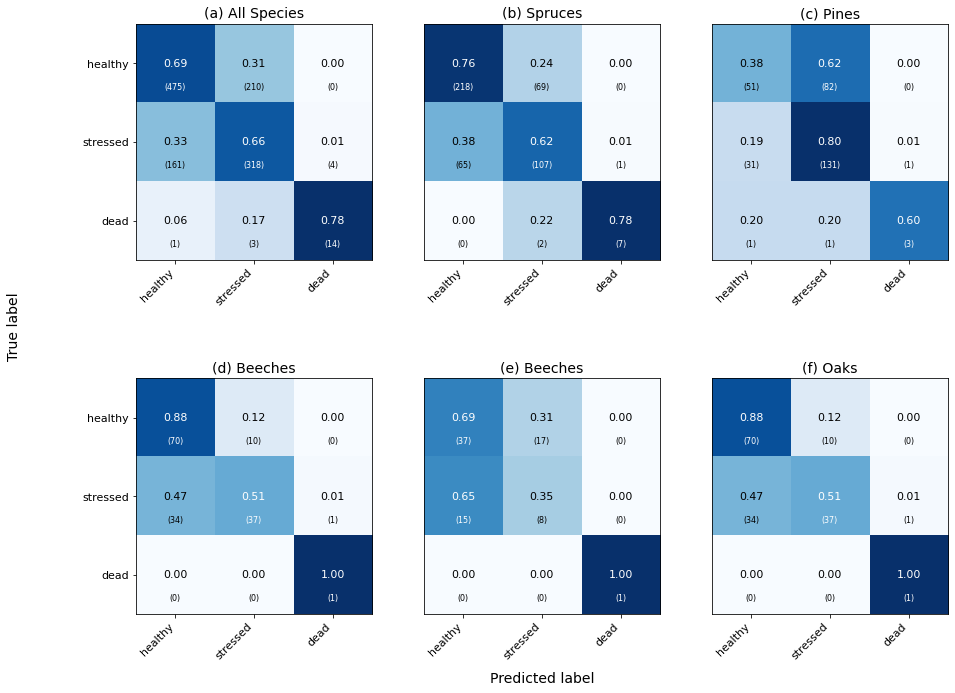

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# List of CSV file paths for each confusion matrix
csv_paths = [all_species, spruces, pines, beeches, oaks, beeches]

# Define labels for the subplot titles
subplot_labels = ['(a) All Species', '(b) Spruces', '(c) Pines', '(d) Beeches', '(e) Beeches', '(f) Oaks']

# Create a figure and gridspec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.5)

# Iterate over the CSV files
for i, csv_path in enumerate(csv_paths):
    # Skip the empty matrix
    #if i == 5:
        #break

    # Load the confusion matrix from the CSV file
    confusion_matrix = pd.read_csv(csv_path, header=None)

    # Create a DataFrame from the confusion matrix data
    df_confusion = pd.DataFrame(confusion_matrix.values, index=class_names, columns=class_names)

    # Calculate the normalized confusion matrix
    normalized_cm = df_confusion.to_numpy() / df_confusion.sum(axis=1).to_numpy()[:, np.newaxis]

    # Get the corresponding subplot coordinates
    row = i // 3
    col = i % 3

    # Adjust the subplot coordinates for the second row
    #if row == 1 and col < 2:  # Exclude the third empty cell
    #    col += 1

    # Create a subplot within the gridspec
    ax = fig.add_subplot(gs[row, col])

    # Plot the confusion matrix
    im = ax.imshow(normalized_cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Set the title with the label and additional information
    ax.set_title(subplot_labels[i], fontsize=14)

    # Set the ticks and tick labels
    ticks = np.arange(len(class_names))
    ax.set_xticks(ticks)
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=11)

    # Display yticks for the first and fourth matrix only
    if i == 0 or i == 3:
        ax.set_yticks(ticks)
        ax.set_yticklabels(class_names, fontsize=11)
    else:
        ax.set_yticks([])

    # Loop over data dimensions and create text annotations for normalized values
    thresh = normalized_cm.max() / 2.0
    for j in range(len(class_names)):
        for k in range(len(class_names)):
            ax.text(k, j, "{:.2f}".format(normalized_cm[j, k]), ha="center", va="center",
                    fontsize=11 if normalized_cm[j, k] > thresh else 11,
                    color="white" if normalized_cm[j, k] > thresh else "black")

    # Loop over data dimensions and create additional text annotations for support count
    for j in range(len(class_names)):
        for k in range(len(class_names)):
            ax.text(k, j + 0.3, "({:.0f})".format(df_confusion.iat[j, k]), ha="center", va="center",
                    fontsize=8,
                    color="white" if normalized_cm[j, k] > thresh else "black")

# Set common labels and title for all subplots
fig.text(0.5, 0.005, 'Predicted label', ha='center', fontsize=14)
fig.text(0.005, 0.5, 'True label', va='center', rotation='vertical', fontsize=14)
#fig.suptitle('Normalized Confusion Matrices with Support Count', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(top=0.92, bottom=0.1, left=0.1, right=0.9, hspace=0, wspace=0)


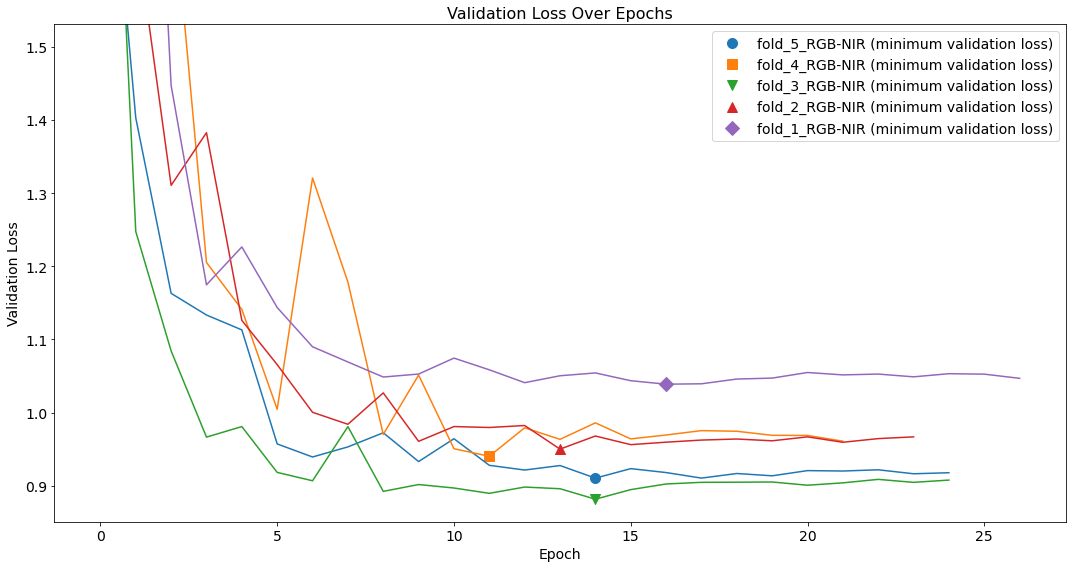

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
path = r"C:\Users\lwfeckesim\Downloads\wandb_export_2023-05-19T16 06 26.118+02 00.csv"
df = pd.read_csv(path)

# Extract the validation loss columns (excluding val_loss__MIN and val_loss__MAX)
val_loss_columns = [col for col in df.columns if 'val_loss' in col and '__MIN' not in col and '__MAX' not in col]

# Define symbols for minimum values
symbols = ['o', 's', 'v', '^', 'D', 'p', 'h']

# Font variables
font_size_ticks = 14
font_size_labels = 14
font_size_symbols = 12
font_size_legend = 14
font_size_title = 16

labels = ['fold_5_RGB-NIR (minimum validation loss)', 'fold_4_RGB-NIR (minimum validation loss)', 'fold_3_RGB-NIR (minimum validation loss)', 'fold_2_RGB-NIR (minimum validation loss)', 'fold_1_RGB-NIR (minimum validation loss)']

# Plot the validation loss
plt.figure(figsize=(15, 8))
handles = []  # To store legend handles
for i, column in enumerate(val_loss_columns):
    line, = plt.plot(df['Step'], df[column], label=column)
    min_value = df[column].min()
    min_index = df[column].idxmin()
    symbol = symbols[i % len(symbols)]
    plt.scatter(df['Step'][min_index], min_value, color=line.get_color(), marker=symbol, s=100)
    handles.append(plt.Line2D([], [], color=line.get_color(), marker=symbol, linestyle='None', markersize=10, label=labels[i]))

# Adjust y-axis limits with padding
min_value = df[val_loss_columns].min().min()
max_value = 1.5
padding = 0.05 * (max_value - min_value)
plt.ylim(min_value - padding, max_value + padding)

plt.xlabel('Epoch', fontsize=font_size_labels)
plt.ylabel('Validation Loss', fontsize=font_size_labels)
plt.title('Validation Loss Over Epochs', fontsize=font_size_title)

# Set font size for ticks
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)

# Set font size for legend
plt.legend(handles=handles, loc='upper right', prop={'size': font_size_legend})

plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

# Save the plot as a PNG file
output_path = r"C:\Users\lwfeckesim\Downloads\validation_loss_plot.png"



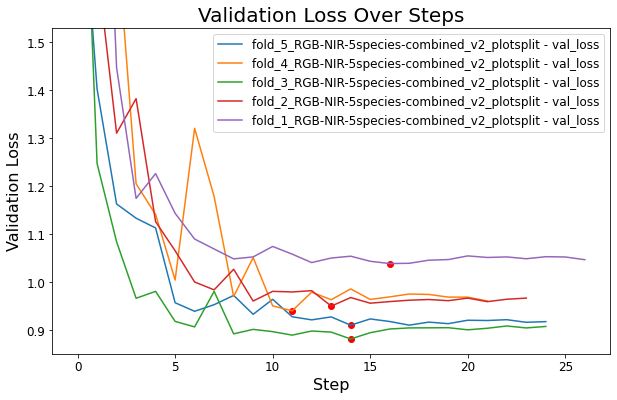

In [149]:
# Read the CSV file
path = r"C:\Users\lwfeckesim\Downloads\wandb_export_2023-05-19T16 06 26.118+02 00.csv"
df = pd.read_csv(path)

# Extract the validation loss columns (excluding val_loss__MIN and val_loss__MAX)
val_loss_columns = [col for col in df.columns if 'val_loss' in col and '__MIN' not in col and '__MAX' not in col]

# Set font size variables
font_size_ticks = 12
font_size_labels = 16
font_size_symbols = 10
font_size_legend = 12
font_size_title = 20

# Plot the validation loss
plt.figure(figsize=(10, 6))
for column in val_loss_columns:
    plt.plot(df['Step'], df[column], label=column)

# Mark the minimum values
for column in val_loss_columns:
    min_value = df[column].min()
    min_index = df[column].idxmin()
    plt.scatter(df['Step'][min_index], min_value, color='red', marker='o')

# Adjust y-axis limits with padding
min_value = df[val_loss_columns].min().min()
max_value = 1.5
padding = 0.05 * (max_value - min_value)
plt.ylim(min_value - padding, max_value + padding)

# Set font size for x and y ticks
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)

# Set font size for x and y labels
plt.xlabel('Step', fontsize=font_size_labels)
plt.ylabel('Validation Loss', fontsize=font_size_labels)

# Set font size for symbols
handles, labels = plt.gca().get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(font_size_symbols)

# Set font size for legend
plt.legend(handles=handles, labels=val_loss_columns, loc='upper right', fontsize=font_size_legend)

# Set font size for title
plt.title('Validation Loss Over Steps', fontsize=font_size_title)

# Save the plot as a PNG file
output_path = r"C:\Users\lwfeckesim\Downloads\validation_loss_plot.png"
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()
